___
# MINIPROJETO 2 - Teorema do limite central

## <font color='red'>Paulo Tozzo, Leonardo Medeiros, Lucas Chen</font>
___

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import itertools

Utilizaremos a distribuição exponencial

In [2]:
# 1b sorteio aleatorio de um número grande de valores da distribuição
tamanho=10000

destribuição_aleatoria_teorica = stats.expon.rvs(loc=0, scale=1, size=tamanho, random_state=None)
da = destribuição_aleatoria_teorica

#1c calculo da media e variancia desses valores
print(np.mean(da))
print(np.var(da))

1.00532122013
1.02455953284


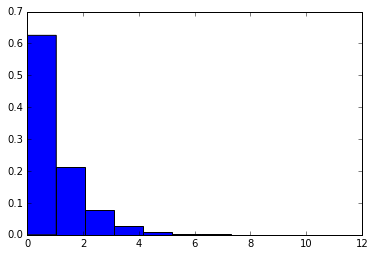

In [3]:
# histograma da distribuição aleatoria
plt.hist(da,normed=1)
print()

0.988513538521
 media:  1.0023968364  mediana:  0.829465625228  variancia:  0.529431731938


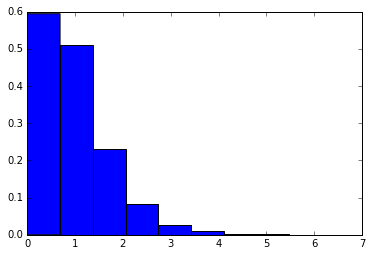

In [4]:
# função da distribuição da média amostral

def tlc(n,tamanho,amostra_aleatoria = False):
    
    # X1 e X9 são necessarios para o item 4
    X1 = []
    X9 = []
    
    
    medias = []
    for i in range (tamanho): 
        l2 = np.random.choice(da,size=n,replace=False) # sorteamos n valores aleatórias da distribuição aleatoria (da)
        
        if amostra_aleatoria != False and n >= 8: # necessario para o item 4
            X1.append(l2[0])
            X9.append(l2[8])
        
        x = np.mean(l2) # calculo da media
        medias.append(x) # append da media em uma lista
        
        
    print(x) # printa a ultima media calculada
    
    print(' media: ',np.mean(medias)," mediana: ",np.median(medias),' variancia: ',np.var(medias))
    
    plt.hist(medias,normed=1) # histograma das medias
    
    medias_medias = np.mean(medias) # calculo da media das medias
    medias_var = np.var(medias) # calculo da variancia das medias
    
    if amostra_aleatoria != False and n>9 : # necessario para o item 4
        return X1,X9
    


tlc(2,tamanho) #histograma das medias para: n=2


como o n é pequeno o grafico não se aproxima de uma normal

0.95903412869
 media:  1.00196867218  mediana:  0.918572213096  variancia:  0.259177178361


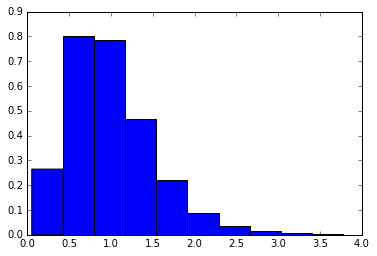

In [5]:
tlc(4,tamanho) #histograma das medias para: n=4

1.03501426302
 media:  1.00553744943  mediana:  0.987951504117  variancia:  0.0506206640079


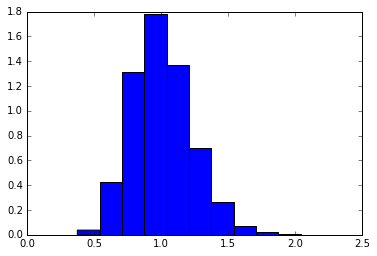

In [6]:
tlc(20,tamanho) #histograma das medias para: n=20

0.941857831062
 media:  1.00506898683  mediana:  0.998641839046  variancia:  0.0202455141343


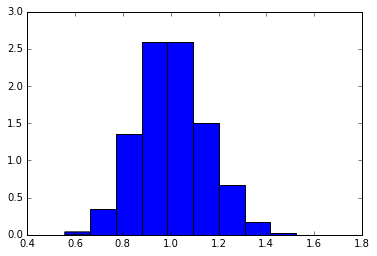

In [7]:
X1,X9 = tlc(50,tamanho,True) #histograma das medias para: n=50 , tambem captura as listas X1 e X9 para o item 4

1.00555377489
 media:  1.005337769  mediana:  1.00179342508  variancia:  0.0103074811886


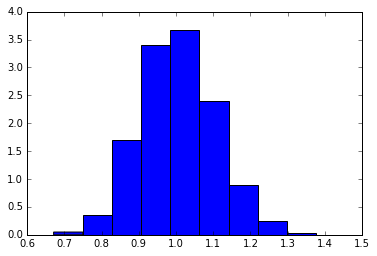

In [8]:
tlc(100,tamanho) #histograma das medias para: n=100

Como vimos através dos resultados obtidos, mesmo escolhendo uma distribuição aleatória que gera um gráfico não similar a uma normal, a distribuiçao da media amostral se torna uma normal apartir de n= 30 se aprocimando mais a esse tipo de distribuição quando n tende a infinito (suficientemente grande), ao calcular  a media da media amostral nessas mesmas condições se obtem o valor mais aprocimado do μ real, com maior precisão, para justificar essa modificação de comportamento pode-se comparar a media, variancia e mediana para cada n diferente. Em uma normal a media e mediana sao iguais, logo quando n aumenta a mediana e media se tornam cada vez mais proximas. Na mesma condição a variancia tende a se tornar menor, representando a aprocimação de μ real.

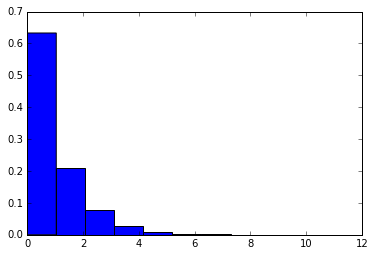

In [9]:
#histograma da lista X1
plt.hist(X1,normed=1)
print( )

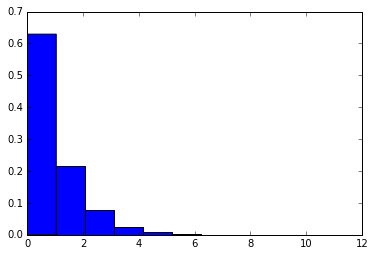

In [10]:
#histograma da lista X9
plt.hist(X9,normed=1)
print()

In [12]:

cv = 0
mediaX1 = np.mean(X1)
mediaX9 = np.mean(X9)

for i in range(tamanho):
    soma = ((X1[i]-mediaX1)*(X9[i]-mediaX9))
    cv += soma
    covariancia = cv/tamanho
    
    correlação = covariancia/(np.var(X1) * np.var(X9))
    
print("Correlação entre X1 e X9:", correlação)           

Correlação entre X1 e X9: -0.0108804840307


Atraves da comparação dos resultados obtidos na construção da distribuição X1 e X2 percebemos que essas distribuições sao independentes entre si,como esperado visto que ambas sao aleatorias, o que se justifica pelo valor correlação, que é muito distante de 1. Como os diversos valores de X1 e X2 sao obtidos aleatoriamente dentro da distribuição aleatoria (da), a distribuição de X1 e X2 tendem a ter o mesmo comportamento da distribuição (da).